### 2021_10_18_1

* os
    * os.listdir()
    * os.getcwd() : 현재 작업 디렉터리 확인

* 시각화 : matplotlib, seaborn, folium, plotly
* 데이터 처리 : pandas
* 선형대수, 난수 발생, 수학함수.. 딥러닝 라이브러리 : numpy
* scikit-learn : sklearn
* SciPy
* mglearn : 저자가 제작한 라이브러리.

### 학습용 데이터와 테스트 데이터를 나눈 이유
* 기본으로 75%, 25%
* 학습용으로는 머신을 학습시키고, 
* 테스트용으로는 머신을 평가한다.
    * 분류 모델의 model.score() : 정확도
    * 회귀 모델의 model.score() : 결정계수(적합도) 0 ~ 1
* from sklearn.model_selection import train_test_split
    * 레이블이 불균형한 데이터가 있어서, stratify = cancer.target
* 5 : 5, 6 : 4, 7 : 3, 8 : 2, 9 : 1 비율별 성능 평가

### 머신러닝
* 지도학습
* 비지도학습
* 강화학습
* 준지도학습

* 지도학습과 비지도학습의 차이
    * 차이점 : target이 존재하는가 존재하지 않는가?

* 지도학습
    * 분류(classification)
    * 회귀(Regression)
        * 우리가 예측하고자 하는 레이블이 연속형인지, 범주형인지?

### 분류와 회귀의 머신러닝 알고리즘
* knn 모델
    * 기본 설명
    * 01 k를 지정한다.
    * 02 분류모델에 사용될 경우, 거리가 가까운 k개의 이웃을 찾고, 이들의 레이블 값을 확인하여 가장 많은 것으로 분류한다.

* knn 모델 - 회귀
    * 01 k를 지정한다.
    * 02 회귀 모델 - 거리상 가장 가까운 k개의 이웃을 찾고, 이웃이 가르키는 예측값(y)의 평균으로 예측한다.

### 모델 파라미터, 하이퍼 파라미터
* 모델 파라미터 : 모델이 정해주는 파라미터.
    * 선형회귀 : 모델이 데이터를 이용해서 학습해서 정해주는 가중치나 편향이 될 수 있다.
* 하이퍼 파라미터 : 사용자가 지정해 주는 파라미터

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

### 머신러닝 모델 만들기
* 모델 선택 및 지정 : model = 모델명(매개변수 = 0...)
* 모델 학습 : model.fit(X_train, y_train)
* 모델 예측 : pred = model.predict(X_test)
* 모델 평가 : pred, y_test 비교해서 평가한다.

### Lasso와 Ridge의 공통점
* 선형 회귀에서 가중치를 제한을 둔다. w의 값을 0에 가깝게 만든다.
* 과대적합을 일반화시켜준다.
* 매개변수(alpha)
    * 크면 클수록 - 0에 가깝게 된다. 제한이 크다.
    * 작으면 작을수록 - 제한이 줄어들어서 0에 가까워지는 것이 줄어든다.
    
### Lasso와 Ridge의 차이점
* Lasso : w의 제한을 둔다. 어떤 가중치(w)를 0으로 만든다.
* Ridge : w의 제한을 둔다. 가중치(w)가 0이 되는 것이 없다.

### 모델 평가지표
* 분류 : model.score() - 정확도(accuracy)
* 회귀 : 결정계수(0 ~ 1), MSE(평균제곱오차), MAE, RMSE, RMLSE

### 의사 결정 트리
* 2가지로 분류한다.
* 노드가 분기할 때 엔트로피/지니계수가 최대한 낮아지도록 모델을 만들어간다.
* 장점 : 시각화를 통해 쉽게 이해가 가능하다.
* 단점 : 과대적합이 일어날 수 있다.
    * 과대적합을 어떻게 해소할 수 있을까?
        * 첫번째 방법 : RandomForest 등의 앙상블 이용하기
        * 두번째 방법 : max_depth에 제한을 둔다.(사전가지치기)

### 앙상블 기법의 RandomForest에 대해 알아보기
* 여러 머신러닝 모델을 연결하여 만드는 기법의 대표적인 알고리즘이다.
* 여러개의 트리를 사용하여 만드는 알고리즘이다.
* 트리를 만드는 2가지 방법
    * 랜덤하게 변수를 선택한다.
    * 중복을 허용한 데이터를 추출한다.(배깅)
        * 약간의 다른 트리를 생성하게 된다.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import pandas as pd

train = pd.read_csv("./CSV/house_train.csv")
test = pd.read_csv("./CSV/house_test.csv")

In [5]:
train.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [8]:
train.shape, test.shape

((15035, 21), (6555, 20))

(array([1.3258e+04, 1.4770e+03, 2.1000e+02, 6.4000e+01, 1.8000e+01,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <BarContainer object of 10 artists>)

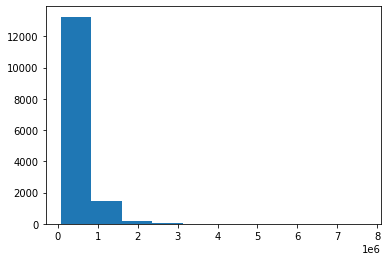

In [9]:
plt.hist(train.price)

In [12]:
print("침실의 수 : \n",
      train['bedrooms'].unique(), test['bedrooms'].unique(), end='\n\n' )
print("화장실의 수 : \n",
      train['bathrooms'].unique(), test['bathrooms'].unique(), end='\n\n' )
print("집의 층수 : \n", train['floors'].unique(), test['floors'].unique(),
      end='\n\n' )
print("집의 전방에 강이 흐르는지 유무 : \n", 
      train['waterfront'].unique(), test['waterfront'].unique(), end='\n\n' )
print("집이 얼마나 좋아 보이는지의 정도 : \n", 
      train['view'].unique(), test['view'].unique(), end='\n\n' )
print("집의 전반적인 상태 : \n", 
      train['condition'].unique(), test['condition'].unique(), end='\n\n' )
print("King County grading 시스템 기준으로 매긴 집의 등급 : \n", 
      train['grade'].unique(), test['grade'].unique(), end='\n\n' )
print("위도 범위 : \n", 
      train['lat'].min(), train['lat'].max(), end='\n\n' )
print("위도 범위 : \n", 
      test['lat'].min(), test['lat'].max(), end='\n\n' )

print("경도 범위 : \n", 
      train['long'].min(), train['long'].max(), end='\n\n' )
print("경도 범위 : \n", 
      test['long'].min(), test['long'].max(), end='\n\n' )

침실의 수 : 
 [ 3  2  5  4  6  1  7  9  8  0 10] [4 3 2 5 6 1 0 7 8 9]

화장실의 수 : 
 [1.   2.   2.25 1.5  2.5  1.75 3.   2.75 3.25 4.   3.5  0.75 4.75 5.
 4.25 4.5  3.75 5.25 6.   1.25 0.5  5.5  6.75 5.75 0.   8.   7.5  7.75
 6.25] [4.5  2.5  3.   1.   1.75 2.   2.25 3.25 4.   1.5  3.5  2.75 0.75 5.
 4.25 0.   1.25 3.75 4.75 5.5  5.25 6.   0.5  6.5 ]

집의 층수 : 
 [1.  2.  1.5 3.  2.5 3.5] [1.  2.  1.5 3.  2.5 3.5]

집의 전방에 강이 흐르는지 유무 : 
 [0 1] [0 1]

집이 얼마나 좋아 보이는지의 정도 : 
 [0 3 4 2 1] [0 3 2 4 1]

집의 전반적인 상태 : 
 [3 4 5 2 1] [3 4 2 5 1]

King County grading 시스템 기준으로 매긴 집의 등급 : 
 [ 7  6  8  9 10 11 12  5  4  3 13  1] [11  7  9  8  6 10  5  4 12 13  1]

위도 범위 : 
 47.1559 47.7776

위도 범위 : 
 47.1593 47.7776

경도 범위 : 
 -122.519 -121.315

경도 범위 : 
 -122.515 -121.315



In [16]:
train.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873


In [14]:
sel = ["condition", "floors", "lat", "long"]
X = train[sel]
y = train["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [15]:
### 3개 모델
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [23]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(knn.score(X_test, y_test)) # 결정계수

0.4684276490243474


/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [24]:
def MSE(real, pred) :
    return (1 / len(real)) * np.sum((real - pred) ** 2)

print(MSE(y_test, pred))

65922009736.41746


In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(mse, rmse)

65922009736.41746 256752.8183611963


In [26]:
mse_val =  ( (pred - y_test) ** 2 ).sum() / len(pred)
print( mse_val )  # mse
print( mse_val ** 0.5 )   # rmse

65922009736.41746
256752.8183611963


In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)

print(lr_model.score(X_test, y_test))

0.18561260970671156


In [28]:
mse_val =  ( (pred - y_test) ** 2 ).sum() / len(pred)
print( mse_val )  # mse
print( mse_val ** 0.5 )   # rmse

100994819188.00688
317796.82060714025


In [41]:
%%time

rf_model = RandomForestRegressor(random_state = 0,
                                n_estimators = 500,
                                n_jobs = -1)
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

print(rf_model.score(X_test, y_test))

0.6102048472172175
CPU times: user 18.9 s, sys: 1.1 s, total: 20 s
Wall time: 3.01 s


In [30]:
mse_val =  ( (pred - y_test) ** 2 ).sum() / len(pred)
print( mse_val )  # mse
print( mse_val ** 0.5 )   # rmse

48237611588.44884
219630.62534275322


In [31]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
print(rf_model.feature_importances_)
print(sel)

[0.03574379 0.08536299 0.49674904 0.38214418]
['condition', 'floors', 'lat', 'long']


In [33]:
imps = pd.Series(rf_model.feature_importances_, index = sel)
imps

condition    0.035744
floors       0.085363
lat          0.496749
long         0.382144
dtype: float64

<AxesSubplot:>

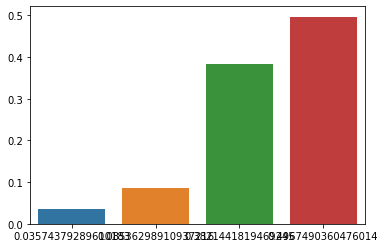

In [34]:
sns.barplot(x = imps.index, y = imps.values, data = imps)

<AxesSubplot:>

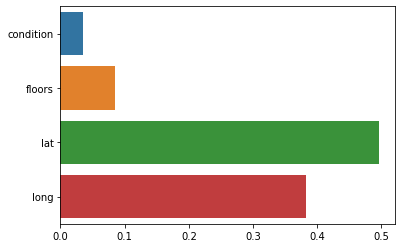

In [39]:
sns.barplot(x = imps.values, y = imps.index)